In [167]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os
import numpy as np
import matplotlib.pyplot as plt
import math

In [168]:
train_dir = os.path.join( 'train')
validation_dir = os.path.join( 'validation')

In [169]:
train_with_mask_dir = os.path.join(train_dir, 'with_mask')  # directory with our training with mask pictures
train_without_mask_dir = os.path.join(train_dir, 'without_mask')  # directory with our training without mask pictures
validation_with_mask_dir = os.path.join(validation_dir, 'with_mask')  # directory with our validation with mask pictures
validation_without_mask_dir = os.path.join(validation_dir, 'without_mask')  # directory with our validation without mask pictures

In [170]:
num_with_mask_tr = len(os.listdir(train_with_mask_dir))
num_without_mask_tr = len(os.listdir(train_without_mask_dir))

num_with_mask_val = len(os.listdir(validation_with_mask_dir))
num_without_mask_val = len(os.listdir(validation_without_mask_dir))

total_train = num_with_mask_tr + num_without_mask_tr
total_val = num_with_mask_val + num_without_mask_val

In [171]:
print('total training with mask images:', num_with_mask_tr)
print('total training without mask images:', num_without_mask_tr)

print('total validation with mask images:', num_with_mask_val)
print('total validation without mask images:', num_without_mask_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training with mask images: 122
total training without mask images: 199
total validation with mask images: 12
total validation without mask images: 23
--
Total training images: 321
Total validation images: 35


In [172]:
batch_size = 32
epochs = 100
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [173]:
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [174]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 319 images belonging to 2 classes.


In [175]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='binary')

Found 33 images belonging to 2 classes.


In [180]:
sample_training_images, _ = next(train_data_gen)

In [181]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

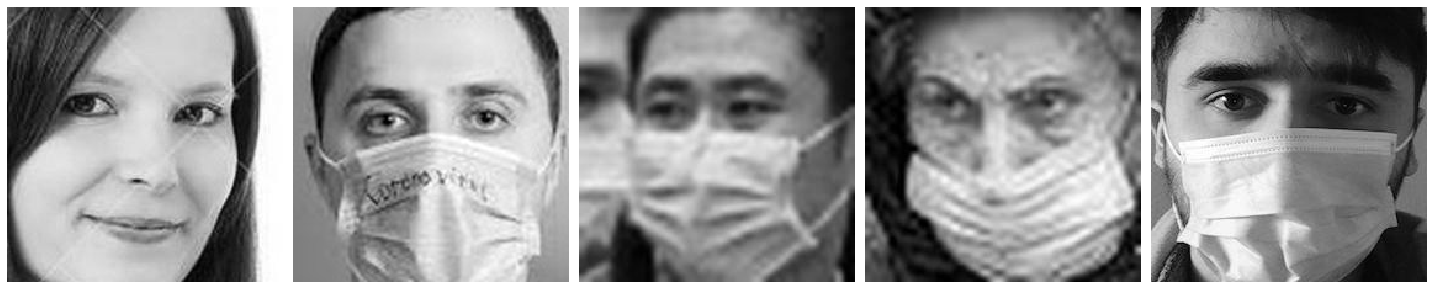

In [182]:
plotImages(sample_training_images[:5])

In [183]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', 
           input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [184]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [185]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 224, 224, 16)      448       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 112, 112, 32)      4640      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 28, 28, 64)       

In [186]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

model.save('my_model.h5')

Epoch 1/100
10/10 [==============================] - 10s 1s/step - loss: 1.5985 - acc: 0.4765 - val_loss: 0.6329 - val_acc: 0.3438
Epoch 2/100
10/10 [==============================] - 7s 748ms/step - loss: 0.6227 - acc: 0.6082 - val_loss: 0.5798 - val_acc: 0.6875
Epoch 3/100
10/10 [==============================] - 7s 747ms/step - loss: 0.4752 - acc: 0.7962 - val_loss: 0.4071 - val_acc: 0.8438
Epoch 4/100
10/10 [==============================] - 7s 745ms/step - loss: 0.3397 - acc: 0.8401 - val_loss: 0.3829 - val_acc: 0.8125
Epoch 5/100
10/10 [==============================] - 8s 770ms/step - loss: 0.2505 - acc: 0.9091 - val_loss: 0.3814 - val_acc: 0.8125
Epoch 6/100
10/10 [==============================] - 8s 751ms/step - loss: 0.1497 - acc: 0.9561 - val_loss: 0.3985 - val_acc: 0.8125
Epoch 7/100
10/10 [==============================] - 8s 782ms/step - loss: 0.1091 - acc: 0.9624 - val_loss: 0.3776 - val_acc: 0.8750
Epoch 8/100
10/10 [==============================] - 8s 751ms/step - lo

Epoch 61/100
10/10 [==============================] - 8s 843ms/step - loss: 4.6666e-05 - acc: 1.0000 - val_loss: 1.0951 - val_acc: 0.9375
Epoch 62/100
10/10 [==============================] - 8s 780ms/step - loss: 3.9721e-05 - acc: 1.0000 - val_loss: 1.0687 - val_acc: 0.9375
Epoch 63/100
10/10 [==============================] - 8s 790ms/step - loss: 2.8189e-05 - acc: 1.0000 - val_loss: 1.1061 - val_acc: 0.9375
Epoch 64/100
10/10 [==============================] - 8s 779ms/step - loss: 3.2170e-05 - acc: 1.0000 - val_loss: 1.0766 - val_acc: 0.9375
Epoch 65/100
10/10 [==============================] - 8s 773ms/step - loss: 3.2319e-05 - acc: 1.0000 - val_loss: 1.0732 - val_acc: 0.9375
Epoch 66/100
10/10 [==============================] - 8s 822ms/step - loss: 3.5066e-05 - acc: 1.0000 - val_loss: 1.0834 - val_acc: 0.9375
Epoch 67/100
10/10 [==============================] - 9s 857ms/step - loss: 3.2534e-05 - acc: 1.0000 - val_loss: 1.1243 - val_acc: 0.9375
Epoch 68/100
10/10 [==============

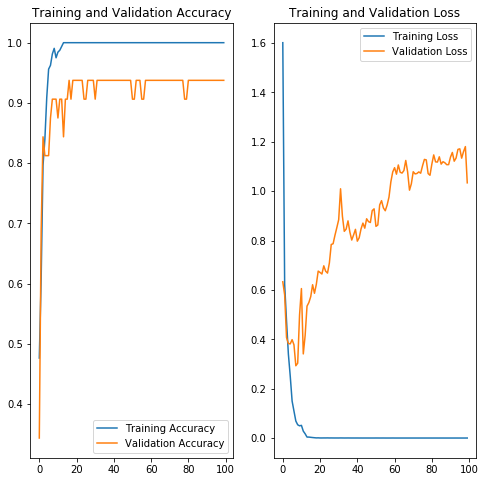

In [187]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [166]:

test_image = image.load_img('./validation/without_mask/with_mask500.jpg'
                   , target_size=(224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image.shape
result = model.predict(test_image)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

sigmoid(result[0])


array([1.], dtype=float32)

[[[188 207   8]
  [173 184   8]
  [191 185  58]
  ...
  [253 221 162]
  [253 221 162]
  [253 221 162]]

 [[179 196   1]
  [182 193  17]
  [195 192  57]
  ...
  [253 221 162]
  [253 221 162]
  [253 221 162]]

 [[179 193   8]
  [188 198  24]
  [187 191  36]
  ...
  [253 221 162]
  [253 221 162]
  [253 221 162]]

 ...

 [[255 222 163]
  [255 222 162]
  [254 225 158]
  ...
  [253 221 162]
  [253 221 162]
  [253 221 162]]

 [[255 222 162]
  [255 223 160]
  [254 224 159]
  ...
  [253 221 162]
  [253 221 162]
  [253 221 162]]

 [[255 223 160]
  [255 223 160]
  [254 224 159]
  ...
  [253 221 162]
  [253 221 162]
  [253 221 162]]]
[[127  35  68  68]]


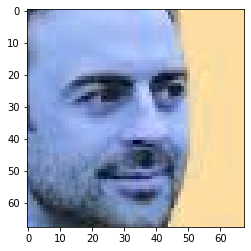

[1.]
No Mask! :(


In [115]:
import cv2
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def predict_on_single_image(model, img_path, face_cascade):
    img = cv2.imread(img_path) #read image in gray scale
    print(img)
    faces = face_cascade.detectMultiScale(img, 1.2, 5) #detect faces
    (x,y,w,h) = faces[0] #take only first face.. just for testing.. later, take all faces into consideration
    sub_img = img[y:y+h, x:x+w] #take part of image that contains the face only
    plt.imshow(sub_img)
    plt.show()
    cv2.imwrite('to_be_deleted.jpg', sub_img) #save part of image that contains the face only
    test_image = image.load_img('to_be_deleted.jpg'
                   , target_size=(224, 224))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image.shape
    result = model.predict(test_image)


    print(sigmoid(result[0]))
    pred = sigmoid(result[0])
    return pred


test_img_1 = './555.jpeg'
test_img_2 = 'test2.png'
face_cascade = cv2.CascadeClassifier('face.xml')

pred = predict_on_single_image(model, test_img_1, face_cascade)
mask_label = 'No Mask! :(' if pred==1 else 'Mask ON :)'
print(mask_label)